# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import os
import warnings


warnings.filterwarnings('ignore')
sns.set()

# Data Preprocessing

### Importing the Database

In [2]:
FILE_PATH = os.path.join(os.getcwd(), 'data','ml_datasource.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


### Removing Outliers

`Remove data points from the DataFrame that meet the following criteria:`

- Minutes watched larger than 1,000 
- Number of courses surpassing 10 
- Number of practice exams started higher than 10 
- Minutes spent on exams going beyond 40 minutes

In [4]:
num_cols_df = df.drop(columns='purchased', axis=1).select_dtypes(include=['number']).columns

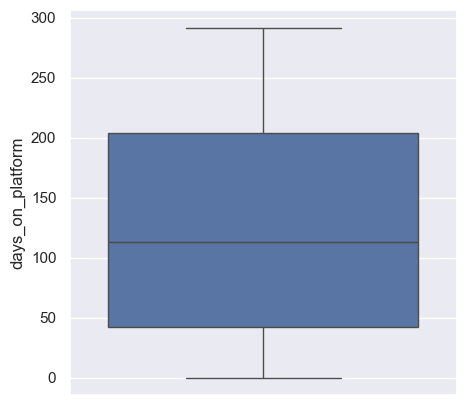

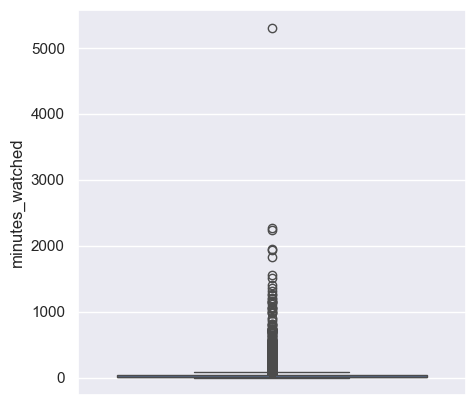

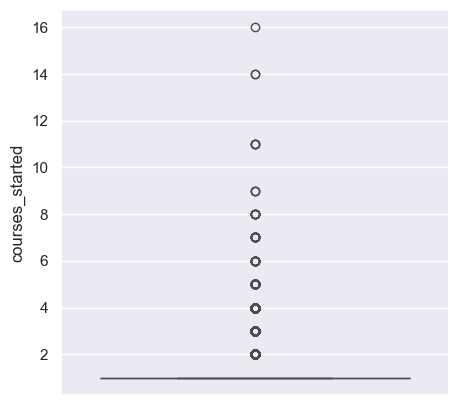

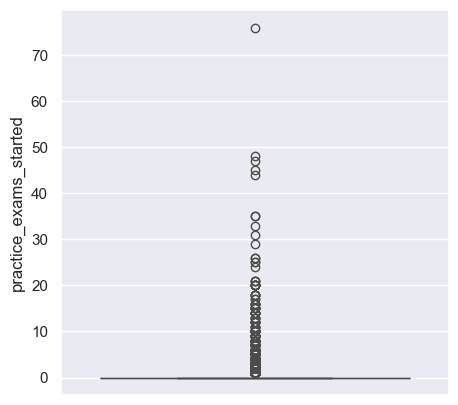

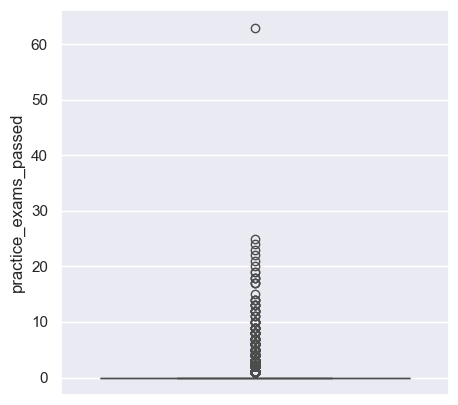

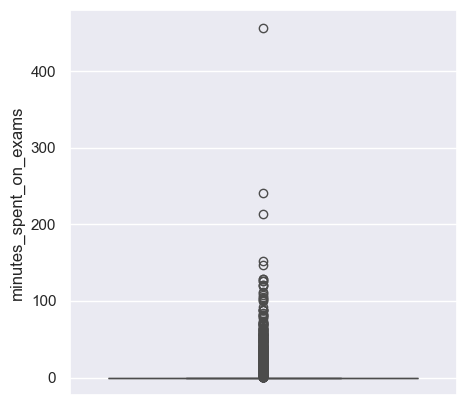

In [5]:
# Detect Outliers
for i in num_cols_df:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, y=i)
    plt.show()

In [6]:
df.shape

(17761, 8)

In [7]:
'''
df_without_outliers = df.copy()
num_cols = df_without_outliers.select_dtypes(include=['number']).columns

for i in num_cols:
    Q1 = df_without_outliers[i].quantile(0.25)
    Q3 = df_without_outliers[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_without_outliers = df_without_outliers[(df_without_outliers[i] > lower_bound) & (df_without_outliers[i] < upper_bound)]
'''

"\ndf_without_outliers = df.copy()\nnum_cols = df_without_outliers.select_dtypes(include=['number']).columns\n\nfor i in num_cols:\n    Q1 = df_without_outliers[i].quantile(0.25)\n    Q3 = df_without_outliers[i].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    df_without_outliers = df_without_outliers[(df_without_outliers[i] > lower_bound) & (df_without_outliers[i] < upper_bound)]\n"

In [8]:
# Removing Outliers
# Removing Minutes watched larger than 1,000
df.drop(df[df['minutes_watched'] >= 1000].index, inplace=True)

# Removing Number of courses surpassing 10
df.drop(df[df['courses_started'] >= 10].index, inplace=True)

# Removing Number of practice exams started higher than 10
df.drop(df[df['practice_exams_started'] >= 10].index, inplace=True)

# Removing Minutes spent on exams going beyond 40 minutes
df.drop(df[df['minutes_spent_on_exams'] >= 40].index, inplace=True)

### Checking for Multicollinearity

`Your task now is to check for multicollinearity in the data using the variance inflation factor (VIF) metric. Identify and remove the numerical feature with the highest VIF value. This is done because this feature is likely redundant with others in the dataset, and its removal can help reduce multicollinearity. After removing the column, calculate the VIF values again for the remaining numerical features. Now identify the feature with the highest VIF value. Is this value larger than 5?`

In [9]:
# Function to calculate VIF for every column
def calculate_vif(data_frame):
    X = add_constant(data_frame)
    vif_data = pd.DataFrame()
    vif_data['Features'] = data_frame.select_dtypes(include='number').columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i+1) for i in range(len(data_frame.columns))]
    return vif_data

In [10]:
vif_df = calculate_vif(df.drop(columns=['student_country']))
print(vif_df)

                 Features        VIF
0        days_on_platform   1.211617
1         minutes_watched   1.587650
2         courses_started   1.365871
3  practice_exams_started  10.013264
4   practice_exams_passed   7.729269
5  minutes_spent_on_exams   3.173145
6               purchased   1.240108


In [11]:
df.drop(columns=['practice_exams_started'], axis=1, inplace=True)

In [12]:
vif_df = calculate_vif(df.drop(columns=['student_country']))
print(vif_df)

                 Features       VIF
0        days_on_platform  1.207876
1         minutes_watched  1.586261
2         courses_started  1.365844
3   practice_exams_passed  2.463354
4  minutes_spent_on_exams  2.472273
5               purchased  1.238838


### Dealing with NaN Values

- `Your task is to substitute all NaN values in the student_country column with the string 'NAM'.`

In [13]:
df.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [14]:
df.loc[df['student_country'].isnull()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [15]:
# Your task is to substitute all NaN values in the student_country column with the string 'NAM'.
df['student_country'].fillna('NAM', inplace=True)

In [16]:
df.isna().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

`Now that the data’s been preprocessed, it’s time to split it into targets and inputs. The former should include only the purchased column, while the latter should contain all columns except the purchased one.`

In [17]:
X = df.drop(columns='purchased', axis=1)
y = df['purchased']

X.shape, y.shape

((17614, 6), (17614,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

In [19]:
X_test.shape

(3523, 6)

### Encoding the Data

`Create a new column in both the x_train and x_test DataFrames called student_country_enc, storing the encoded values of the countries. Then, drop the original student_country column.`

In [20]:
# Encoding Categorical Columns (student_country)
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)

# Fit on training data
X_train[['student_country_enc']] = encoder.fit_transform(X_train[['student_country']])

# Fit on testing data
X_test[['student_country_enc']] = encoder.transform(X_test[['student_country']])

In [21]:
# dropping the original columns
X_train.drop(columns='student_country', axis=1, inplace=True)
X_test.drop(columns='student_country', axis=1, inplace=True)

In [22]:
# Converting X_train, X_test, y_train, y_test to np.array To avoid possible library incompatibility issues
X_train_array = np.array(X_train, dtype='float')
y_train_array = np.array(y_train, dtype='int')
X_test_array = np.array(X_test, dtype='float')
y_test_array = np.array(y_test, dtype='int')

# Creating a Logistic Regression Model

`Create a logistic regression model using the training data and the Logit() function from the statsmodels library. Output the result’s summary. Then, predict the outcome of the test data. Follow these steps accordingly:`

- If the predicted probability is smaller than or equal to 0.5, consider the prediction 0—the student won’t purchase a subscription. 
- If the predicted probability is larger than 0.5, consider the prediction 1—the student will purchase a subscription.
- Create a confusion matrix of your predictions.

In [23]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
X_train_array = sm.add_constant(X_train_array)

In [25]:
model = sm.Logit(y_train_array, X_train_array)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.152560
         Iterations 10


In [26]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14091
Model:                          Logit   Df Residuals:                    14084
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.5037
Time:                        23:27:17   Log-Likelihood:                -2149.7
converged:                       True   LL-Null:                       -4331.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1591      0.116     -9.955      0.000      -1.387      -0.931
x1            -0.0634      0.002    -30.594      0.000      -0.067      -0.059
x2             0.0122      0.001     17.188      0.0

In [27]:
# Get predicted probabilities
y_pred_prob = result.predict(X_train_array)

# Convert to 0 or 1
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

In [28]:
print(f"Accuracy: {accuracy_score(y_train_array, y_pred)*100:.2f}%")

Accuracy: 95.26%


In [29]:
confusion_matrix(y_train_array, y_pred)

array([[12658,   135],
       [  533,   765]])

|              | **Predicted 0** | **Predicted 1** |
| ------------ | --------------- | --------------- |
| **Actual 0** | 12,658 (TN)     | 135 (FP)        |
| **Actual 1** | 533 (FN)        | 765 (TP)        |


In [30]:
TN, FP, FN, TP = 12658, 135, 533, 765

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

accuracy, precision, recall, f1

(0.9525938542331985, 0.85, 0.5893682588597843, 0.6960873521383075)

In [31]:
df.shape

(17614, 7)

# Creating a K-Nearest Neighbors Model

`Use the training data and sklearn’s GridSearch optimizer to find the best K-nearest neighbors model. Let the decision for the best model be based on the accuracy score. Consider the following range of parameters:`

- Number of neighbors – between 1 and 50, inclusive 
- Weights – uniform and distance
- Build a confusion matrix and print a classification report.


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1,51)),
    'weights': ['uniform', 'distance']
}

In [34]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1, scoring='accuracy')

In [35]:
# ValueError: X has 6 features, but KNeighborsClassifier is expecting 7 features as input.

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Convert to numpy
X_train_array = X_train.to_numpy(dtype=float)
X_test_array = X_test.to_numpy(dtype=float)

In [36]:
grid_search.fit(X_train_array, y_train_array)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [37]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy: {round(grid_search.best_score_, 2)*100}%")

Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy: 96.0%


In [38]:
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test_array)

In [39]:
conf_matrix = confusion_matrix(y_test_array, y_pred)
print(conf_matrix)

[[3134   64]
 [  83  242]]


|              | **Predicted 0** | **Predicted 1** |
| ------------ | --------------- | --------------- |
| **Actual 0** | 3134 (TN)     | 64 (FP)        |
| **Actual 1** | 83 (FN)        | 242 (TP)        |

In [40]:
class_report = classification_report(y_test_array, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3198
           1       0.79      0.74      0.77       325

    accuracy                           0.96      3523
   macro avg       0.88      0.86      0.87      3523
weighted avg       0.96      0.96      0.96      3523



# Creating a Support Vector Machines Model

`Use the training data and sklearn’s GridSearch optimizer and SVC (Support Vector Classification) estimator to find the best support vector machines model. Let the decision for the best model again be based on accuracy. Consider the following range of parameters:`

- kernel – linear, poly, or rbf 
- C – between 1 and 10, inclusive 
- gamma – scale or auto.
- Before feeding the training data to the model, use sklearn's MinMaxScaler function to constrict the features in ranges between -1 and 1.
- To test the model, build a confusion matrix and print a classification report.

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
svc = SVC()

param_grid = {
    'kernel':['linear', 'poly', 'rbf'],
    'C' : list(range(1,11)),
    'gamma' : ['scale', 'auto']
}

In [43]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)

In [44]:
scaler = MinMaxScaler(feature_range=(-1,1))

X_train_scaled = scaler.fit_transform(X_train_array)
X_test_scaled = scaler.fit_transform(X_test_array)

In [45]:
grid_search.fit(X_train_scaled, y_train_array)

,estimator,SVC()
,param_grid,"{'C': [1, 2, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,5


In [46]:
best_svc = grid_search.best_estimator_

y_pred = best_svc.predict(X_test_scaled)

In [47]:
grid_search.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'poly'}

In [48]:
accuracy_score(y_test_array, y_pred)

0.9528810672722112

In [49]:
class_report = classification_report(y_test_array, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3198
           1       0.81      0.64      0.71       325

    accuracy                           0.95      3523
   macro avg       0.89      0.81      0.84      3523
weighted avg       0.95      0.95      0.95      3523



# Creating a Decision Trees Model

`Use the (non-scaled) training data and sklearn’s GridSearch and DecisionTreeClassifier functions to find the best decision tree model. Let the best model be determined based on accuracy.`
- Loop only through the parameter ccp_alpha and test the values 0, 0.001, 0.002, 0.003, 0.004, and 0.005. 
- Set a random state of 365 to control the randomness of the estimator.
- Display the decision tree, build a confusion matrix, and print a classification report. Interpret the results.

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [51]:
dt = DecisionTreeClassifier()

param_grid = {
    'ccp_alpha' : [0, 0.001, 0.002, 0.003, 0.004, 0.005],
    'random_state' : [365]
}

In [52]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)

grid_search.fit(X_train_array, y_train_array)

,estimator,DecisionTreeClassifier()
,param_grid,"{'ccp_alpha': [0, 0.001, ...], 'random_state': [365]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [53]:
best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test_array)

In [54]:
grid_search.best_params_

{'ccp_alpha': 0.001, 'random_state': 365}

In [55]:
accuracy_score(y_test_array, y_pred)

0.9605449900652853

In [56]:
class_report = classification_report(y_test_array, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3198
           1       0.88      0.66      0.76       325

    accuracy                           0.96      3523
   macro avg       0.92      0.83      0.87      3523
weighted avg       0.96      0.96      0.96      3523



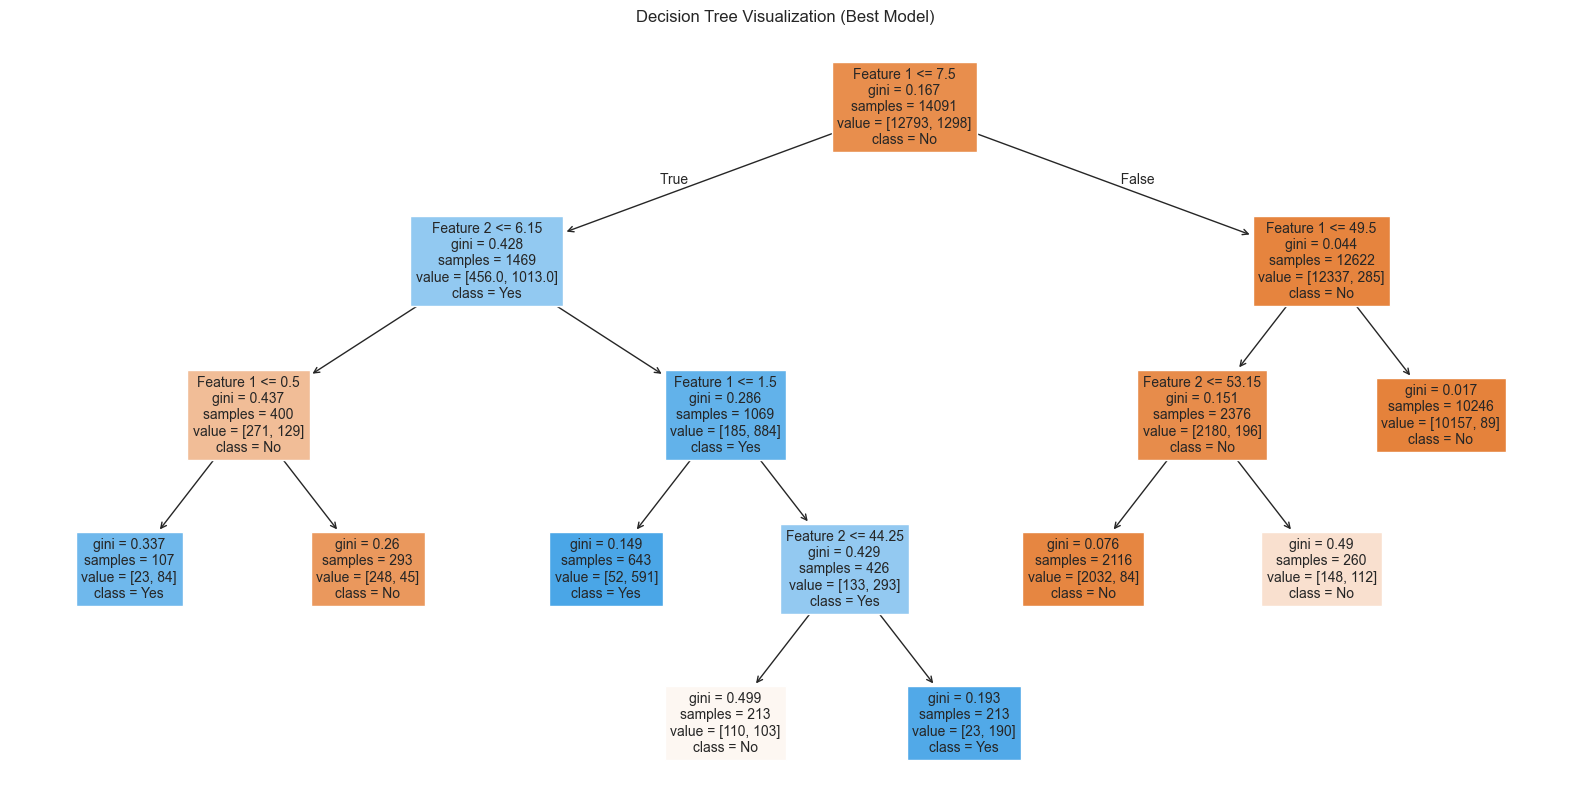

In [ ]:
# Getting Columns's names because we trained the model in numpy array
feature_names = [f"Feature {i}" for i in range(X_train_array.shape[1])]

# Plotting Tree
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    filled=True,
    class_names=['No', 'Yes'],
    feature_names=feature_names,
    fontsize=10
)

plt.title("Decision Tree Visualization (Best Model)")
plt.show()

# Creating a Random Forests Model

Using sklearn’s RandomForestClassifier and the ccp_alpha value that gave the best accuracy in the previous task (Creating a Decision Trees Model), create a Random Forest model.
- Set a random state of 365 to control the randomness of the estimator. Leave all other arguments at their default values.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
rf = RandomForestClassifier(ccp_alpha=0.001)

rf.fit(X_train_array, y_train_array)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred = rf.predict(X_test_array)

In [61]:
accuracy_score(y_test_array, y_pred)

0.963383479988646

In [62]:
class_report = classification_report(y_test_array, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3198
           1       0.84      0.74      0.79       325

    accuracy                           0.96      3523
   macro avg       0.91      0.87      0.88      3523
weighted avg       0.96      0.96      0.96      3523

